In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
data = pd.read_csv("/Users/akshaygopinath/Downloads/diabetes.csv")

In [5]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

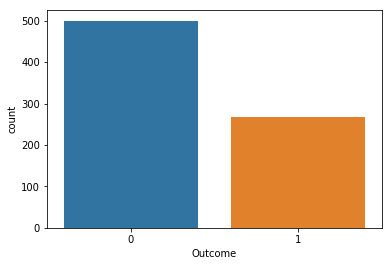

In [7]:
sb.countplot(data['Outcome'],label="Count")

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

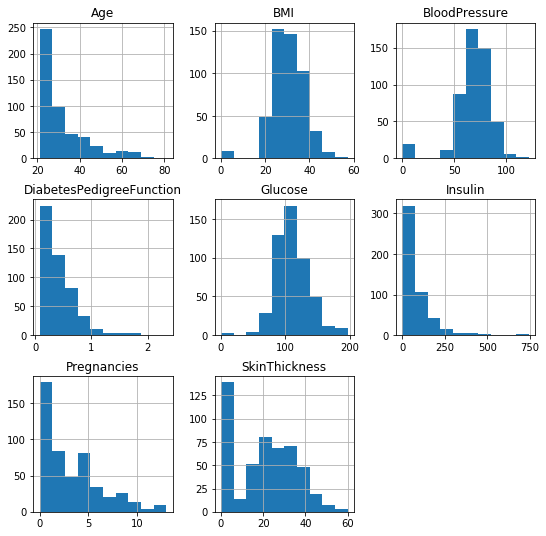

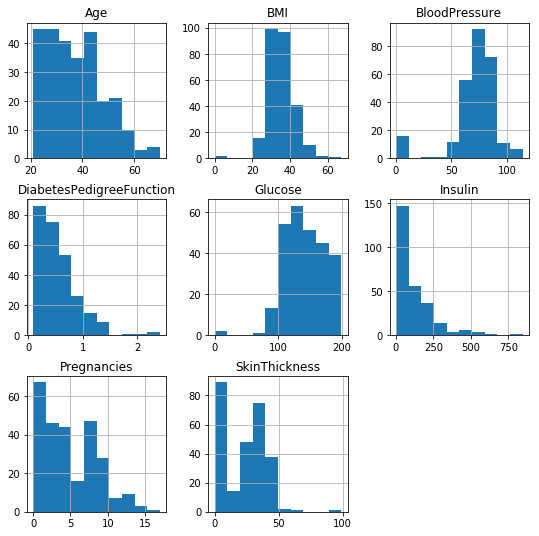

In [8]:
data.groupby('Outcome').hist(figsize=(9,9))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'Outcome'],
                                                   data['Outcome'],stratify=data['Outcome'],test_size=0.1, random_state = 66)

In [10]:
pd.concat((X_test,y_test),axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
74,1,79,75,30,0,32.0,0.396,22,0
84,5,137,108,0,0,48.8,0.227,37,1
534,1,77,56,30,56,33.3,1.251,24,0
404,5,168,64,0,0,32.9,0.135,41,1
497,2,81,72,15,76,30.1,0.547,25,0
190,3,111,62,0,0,22.6,0.142,21,0
517,7,125,86,0,0,37.6,0.304,51,0
614,11,138,74,26,144,36.1,0.557,50,1
471,0,137,70,38,0,33.2,0.170,22,0
510,12,84,72,31,0,29.7,0.297,46,1


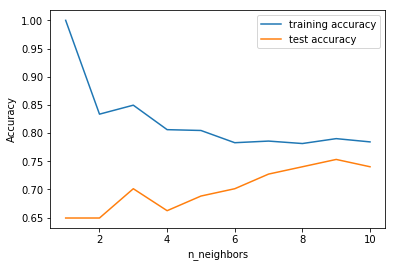

In [11]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    #build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("knn_compare_model")

In [12]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=0.25)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, 

In [13]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [14]:
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train,y_train)))

Accuracy of K-NN classifier on training set: 0.79


In [15]:
print('Accuracy of K-NN classifier on testing set: {:.2f}'.format(knn.score(X_test,y_test)))

Accuracy of K-NN classifier on testing set: 0.75


In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [20]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Cuve')
    plt.legend()
    plt.show()

In [22]:
probs = knn.predict_proba(X_test)
probs

array([[0.88888889, 0.11111111],
       [0.22222222, 0.77777778],
       [1.        , 0.        ],
       [0.22222222, 0.77777778],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.44444444, 0.55555556],
       [0.33333333, 0.66666667],
       [0.77777778, 0.22222222],
       [0.55555556, 0.44444444],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.88888889, 0.11111111],
       [0.33333333, 0.66666667],
       [0.77777778, 0.22222222],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       [0.22222222, 0.77777778],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.44444444, 0.55555556],
       [0.22222222, 0.77777778],
       [0.77777778, 0.22222222],
       [0.55555556, 0.44444444],
       [0.88888889, 0.11111111],
       [1.

In [23]:
probs = probs[:,1]
probs

array([0.11111111, 0.77777778, 0.        , 0.77777778, 0.        ,
       0.        , 0.55555556, 0.66666667, 0.22222222, 0.44444444,
       0.66666667, 1.        , 0.33333333, 0.33333333, 0.11111111,
       0.66666667, 0.22222222, 0.        , 0.        , 0.11111111,
       0.        , 0.11111111, 0.77777778, 0.        , 0.33333333,
       0.55555556, 0.77777778, 0.22222222, 0.44444444, 0.11111111,
       0.        , 0.55555556, 0.44444444, 0.33333333, 0.88888889,
       0.44444444, 0.44444444, 0.44444444, 0.        , 0.55555556,
       0.55555556, 0.66666667, 0.11111111, 0.22222222, 0.22222222,
       0.11111111, 0.22222222, 0.11111111, 0.77777778, 0.44444444,
       0.22222222, 0.44444444, 0.22222222, 0.44444444, 0.55555556,
       0.66666667, 0.55555556, 0.11111111, 0.33333333, 0.33333333,
       0.55555556, 0.11111111, 0.44444444, 0.33333333, 0.44444444,
       0.11111111, 0.55555556, 0.33333333, 0.        , 0.66666667,
       0.        , 0.44444444, 0.        , 1.        , 0.11111

In [24]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.80


In [25]:
fpr, tpr, thresholds = roc_curve(y_test,probs)

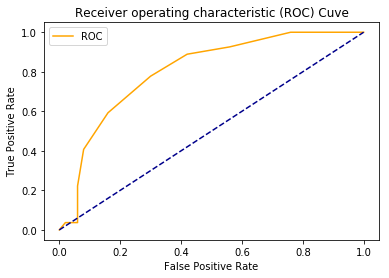

In [26]:
plot_roc_curve(fpr, tpr)